## Visualizing Graph Networks
Graph Introductory Material:
<p><a href = "https://towardsdatascience.com/introduction-to-graphs-part-1-2de6cda8c5a5">Part 1</a>,
   <a href = "https://towardsdatascience.com/graph-algorithms-part-2-dce0b2734a1d">Part 2</a>

<p>Sources: 
<p><a href = "https://networkx.github.io/documentation/stable/tutorial.html">networkx tutorial</a>
    
<p><a href = "https://towardsdatascience.com/getting-started-with-network-datasets-92ec54958c07"> Getting Started with Network Datasets</a>

<p><a href = "https://www.datacamp.com/community/tutorials/social-network-analysis-python">Social Network Analysis in Python</a>

<p> We will first look at the tutorial and then a couple of examples below.

In [1]:
#networkx tutorial shows standard methods to add nodes/edges
#More interesting is adding attributes to graph and nodes

import networkx as nx

G = nx.Graph(day="Friday")
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]['room'] = 714

#print graph and node attributes
print('Graph: ', G.graph)
G.nodes.data()


Graph:  {'day': 'Friday'}


NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [2]:
#Edge attributes can also be added:
G.add_edge(1, 2, weight=4.7 )

#Adds vertices 4 and 6 to graph when an edge to them is added to graph.
G.add_edges_from([(3, 4), (4, 6)], color='blue')
G.add_edges_from([(1, 2, {'color': 'red'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

#Interested in displaying graphs, here is simple default plot
import matplotlib.pyplot as plt

print("Nodes: ", list(G.nodes))
print("Edges: ", list(G.edges))
print(G.nodes.data())
nx.draw_networkx(G)  

Nodes:  [1, 3, 2, 4, 6]
Edges:  [(1, 2), (3, 4), (3, 2), (4, 6)]
[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm'}), (2, {}), (4, {}), (6, {})]


[(1, 2, {'weight': 4.7, 'color': 'red'}), (3, 4, {'color': 'blue', 'weight': 4.2}), (3, 2, {'weight': 8}), (2, 4, {'color': 'red'}), (2, 6, {'color': 'red'}), (4, 6, {'color': 'blue'})]


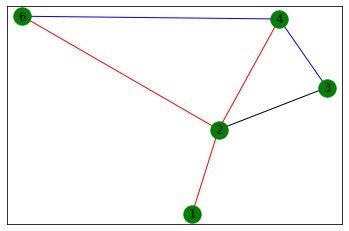

In [3]:
G.add_edges_from([(2, 4), (2, 6)], color='red')

print(G.edges.data())

#Color the edges
ec = [ c for (u,v,c) in G.edges.data('color', default='black')]        
#color the nodes and edges in the graph 
nx.draw_networkx(G, node_color="green", edge_color=ec)

[(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)]


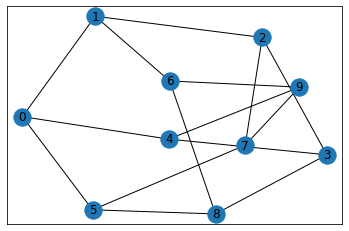

In [4]:
#Petersen graph has 10 vertices and 15 edges
#So every node has a degree of 3 
G = nx.petersen_graph()
print(list(G.edges))
nx.draw_networkx(G)

### networkx provides basic functionality for visualizing plots
It's main goal is graph analysis, but some example are here:
https://networkx.github.io/documentation/latest/auto_examples/index.html

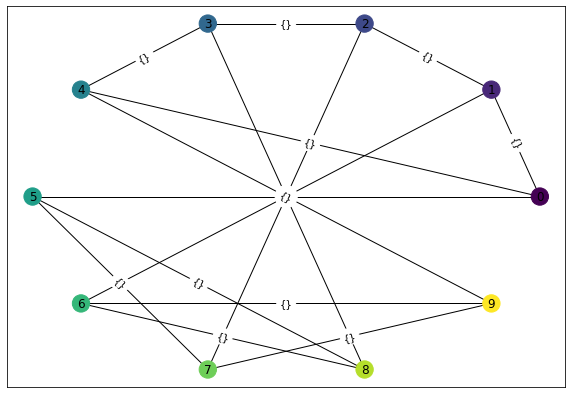

In [5]:
#Can customize with other nx draw methods
fig, ax = plt.subplots(figsize=(10, 7))

#specify graph layout, try random, spiral, spring, spectral
pos = nx.circular_layout(G) 

#Specify how to display nodes and edges
nodes = nx.draw_networkx_nodes(G,pos, node_color = G.nodes)
nlabels = nx.draw_networkx_labels(G,pos)
edges = nx.draw_networkx_edges(G,pos)
edge_labels = nx.draw_networkx_edge_labels(G,pos)


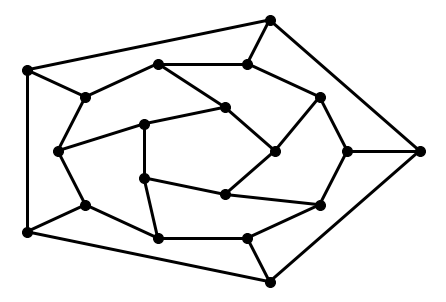

In [6]:
#options for draw_shell()
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}

G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
#nx.draw_networkx(G)

nx.draw_shell(G, nlist=shells, **options)
#nx.draw_circular(G,  **options)

### Networkx includes some example data sets
The <a href = "https://towardsdatascience.com/getting-started-with-network-datasets-92ec54958c07"> Getting Started with Network Datasets</a> works with some like Karate Club

In [7]:
#Karate Club example - remove edges to create two disconnected subgraphs
#Note provided code is python 2.7, so several changes required
import networkx as nx

def edge_to_remove(G):  # high betweenness edges are removed first
 dic1 = nx.edge_betweenness_centrality(G)
 list_tuples = list(dic1.items())  #updated for python 3
 list_tuples.sort(key =lambda x:x[1], reverse = True)
 return list_tuples[0][0] #(a,b)

#Added function since nx.connected_component_subgraphs not found
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
        
def girvan(G): # returns number of connected components
 c = connected_component_subgraphs(G)
 i=0
 while(i<11): # you can experiment with different values
  G.remove_edge(*edge_to_remove(G))
  i+=1 #Left out in article
 return c

G = nx.karate_club_graph() # imports popular zachary karate club
c = girvan(G) # After enough edge removal, groups printed

for i in c:
 print ('Group Nodes: ', i.nodes())
 print ('Number Of Nodes: ', i.number_of_nodes())

# Networkx Examples
G =nx.karate_club_graph() # Can be applied on different graphs
print(G.size(),nx.average_shortest_path_length(G))
G = nx.davis_southern_women_graph()
print(G.size(), nx.average_shortest_path_length(G))
G = nx.florentine_families_graph()
print(G.size(), nx.average_shortest_path_length(G))



Group Nodes:  [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
Number Of Nodes:  15
Group Nodes:  [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Number Of Nodes:  19
78 2.408199643493761
89 2.306451612903226
20 2.4857142857142858


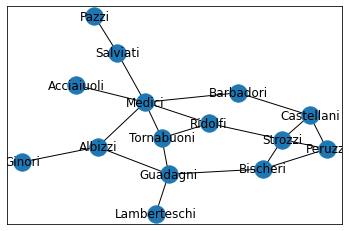

In [8]:
#Visualize the last graph
import matplotlib.pyplot as plt
nx.draw_networkx(G)

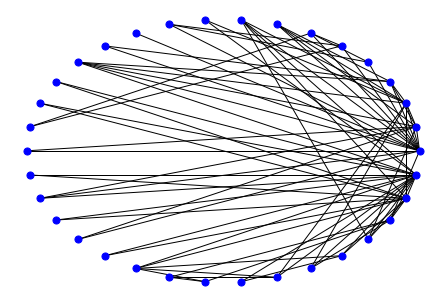

In [9]:
#options for draw_shell()
options = {
    'node_color': 'blue',
    'node_size': 50,
    'width': 1,
}

G =nx.karate_club_graph() 
nx.draw_circular(G, **options)

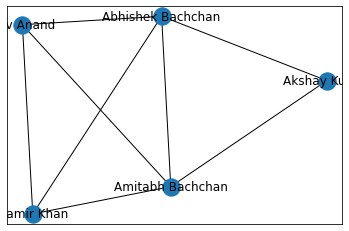

In [10]:
#Trying with small graph from Social Network article
import networkx as nx
import matplotlib.pyplot as plt
G_symmetric = nx.Graph()
G_symmetric.add_edge('Amitabh Bachchan','Abhishek Bachchan')
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan')
G_symmetric.add_edge('Amitabh Bachchan','Akshay Kumar')
G_symmetric.add_edge('Amitabh Bachchan','Dev Anand')
G_symmetric.add_edge('Abhishek Bachchan','Aamir Khan')
G_symmetric.add_edge('Abhishek Bachchan','Akshay Kumar')
G_symmetric.add_edge('Abhishek Bachchan','Dev Anand')
G_symmetric.add_edge('Dev Anand','Aamir Khan')
nx.draw_networkx(G_symmetric)

### Facebook data
You will need to download facebook_combined.txt from katie

In [11]:
#Both articles reference the Facebook data set from SNAP
import networkx as nx
import matplotlib.pyplot as plt

#G = nx.read_edgelist('https://katie.mtech.edu/classes/csci444/notebooks/data/facebook_combined.txt')
G = nx.read_edgelist('data/facebook_combined.txt')
print(nx.info(G))
#print(nx.average_shortest_path_length(G)) # Takes 4 mins approx.


FileNotFoundError: [Errno 2] No such file or directory: 'data/facebook_combined.txt'

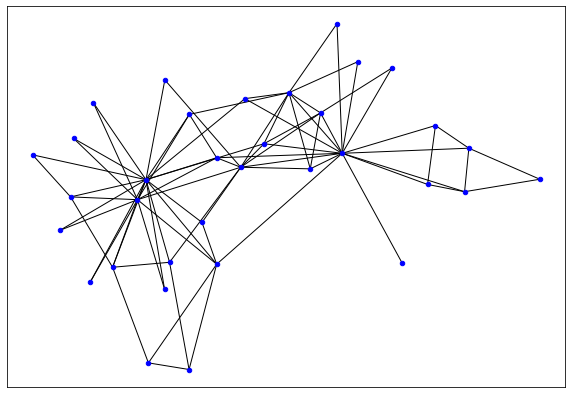

In [12]:
#%matplotlib qt5
fig, ax = plt.subplots(figsize=(10, 7))
options = {
    'node_color': 'blue',
    'node_size': 20,
    'width': 1,
}
nx.draw_networkx(G, **options, with_labels=False)

(-0.7031009109973395,
 1.0811000433808258,
 -0.4105809335282536,
 0.4962471995119181)

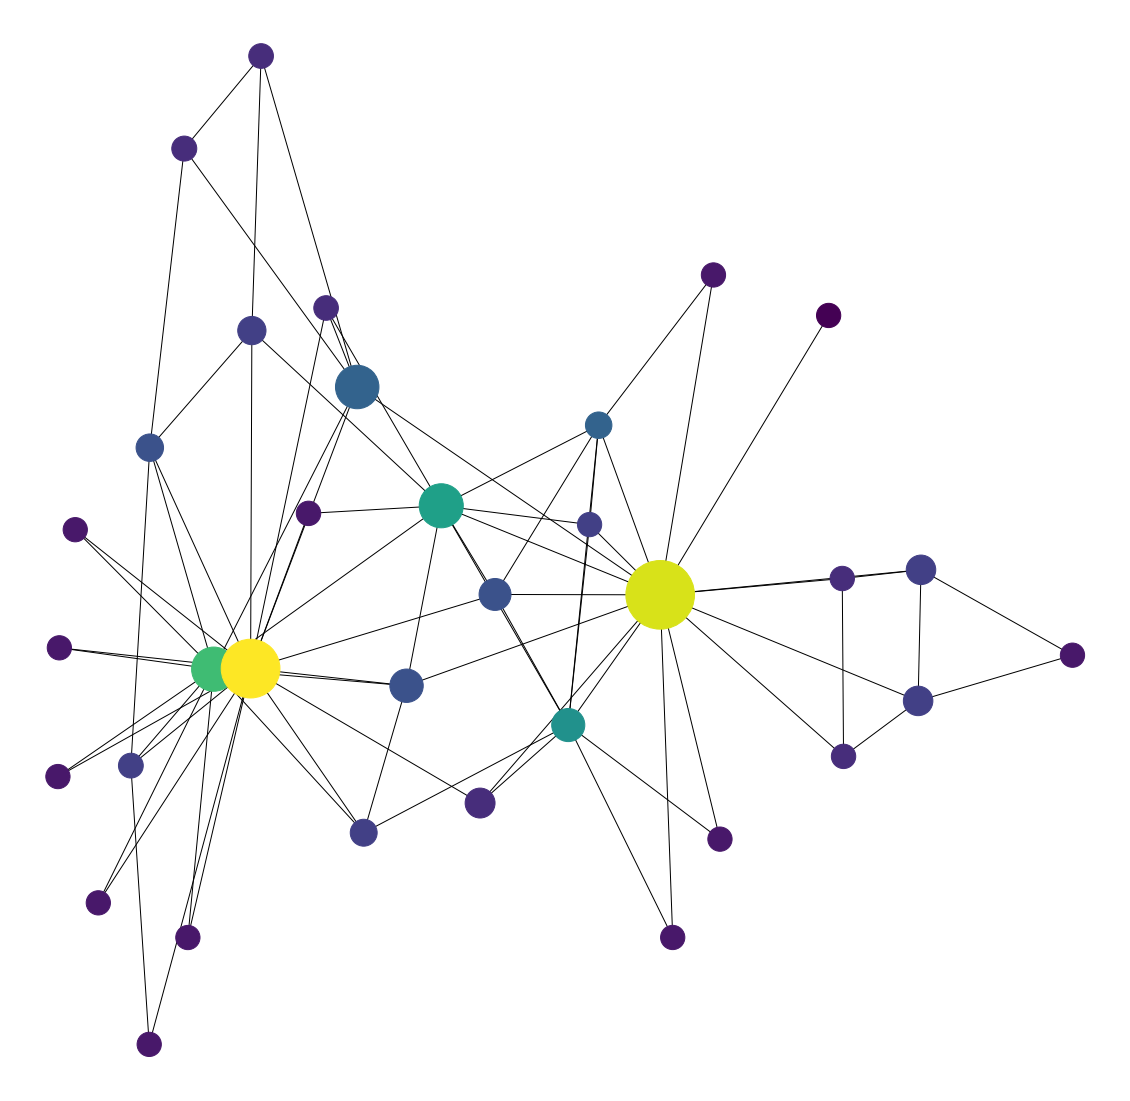

In [13]:
#From https://www.datacamp.com/community/tutorials/social-network-analysis-python
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [ G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

### How else might the data be visualized?


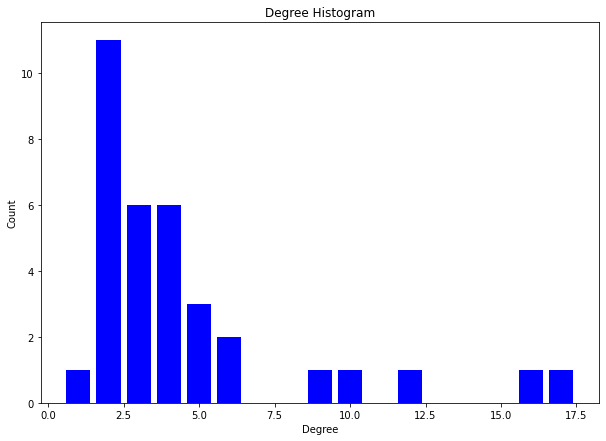

In [14]:
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
#print ("Degree sequence: ", degree_sequence)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(10, 7))
plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()

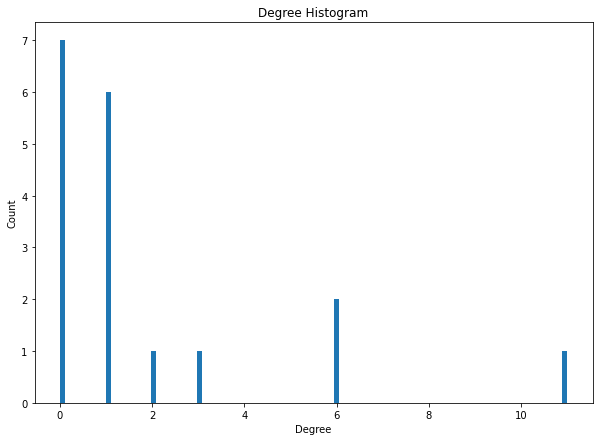

In [15]:
fig, ax = plt.subplots(figsize=(10, 7))
freqlist = nx.degree_histogram(G)
plt.hist(freqlist, 100)
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()


## Plotly example
https://plot.ly/python/network-graphs/

In [16]:
import networkx as nx

#Create a random graph
G=nx.random_geometric_graph(200,0.125)
pos=nx.get_node_attributes(G,'pos')

dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

p=nx.single_source_shortest_path_length(G,ncenter)

In [17]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)


#Create edges
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.node[edge[0]]['pos']
    x1, y1 = G.node[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in G.nodes():
    x, y = G.node[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    
#color nodes
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = '# of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

iplot(fig)

AttributeError: 'Graph' object has no attribute 'node'